In [1]:
from packing_algorithms.rectangle_packing import *
from packing_algorithms.polygon_packing import *
from plotting.plotting import *

import random

%matplotlib inline

This notebook provides a short demonstration on how to use the functions in this repository.

# Produce a Random Instance of Polygons

For demonstration purposes, we first generate an instance of random convex polygons. Our algorithm takes as argument a list of convex polygons, each one defined as a list of its vertices.

In [2]:
# Set the amount of polygons we want to generate
n = 300

# Set the parameter 'c', that influences the width of the strip.
c = 15

# Set the minimum and maximum number of vertices each of the randomly generated polygons should have
min_vert = 3
max_vert = 7

# Randomly generate a set of polygons with min_vert to max_vert vertices each.
polygons = [[(random.random()/5, random.random()/5) for j in range(random.randint(min_vert, max_vert))] for i in range(n)]

# Translate all polygons so that they touch both the x=0 and y=0 axis. Our algorithm needs this standardization.
polygons = [left_bottom_adjust_polygon(polygon) for polygon in polygons]

In [3]:
# Each polygon is given as a list of its vertices. Each vertex is given as a tuple of non-negative real numbers
polygons[int(n/2)]

[(0.16649880047641363, 0.09813175312709402),
 (0.16894686646774318, 0.05108589884705994),
 (0.0, 0.06298189839484622),
 (0.018640010475568954, 0.0),
 (0.06212691598875804, 0.02012136204526567)]

# Compute a Packing of the Polygons using our Algorithm

We now use our main algorithm to pack the produced instance of polygons.

In [4]:
# The function 'polygon_packing' provides our main algorithm. The parameter 'rectangle_strip_packing_algorithm' can be set to either 'nfdh' or 'ffdh', depending on which rectangle shelf-packing algorithm should be used as a subroutine.
packed_polygons, bounding_parallelograms, width, height = polygon_packing(polygons, c=c, rectangle_strip_packing_algorithm="ffdh")

Outputs of the function are the polygons with their location in the packing, the bounding parallelograms of the polygons, as well as the total width and height of the packing.

In [5]:
# Each polygon is again given as list of its vertices, however now translated to where it lies in the packing produced by the algorithm.
packed_polygons[int(n/2)]

[(2.15480095484651, 1.3646456961528972),
 (2.1572490208378396, 1.3175998418728632),
 (1.9883021543700963, 1.3294958414206495),
 (2.006942164845665, 1.2665139430258032),
 (2.050429070358854, 1.2866353050710688)]

# Visualize the Packing

Finally, we can call a function to plot the produced packing.

Saved plot under 'plotting/plots/demo_packing'


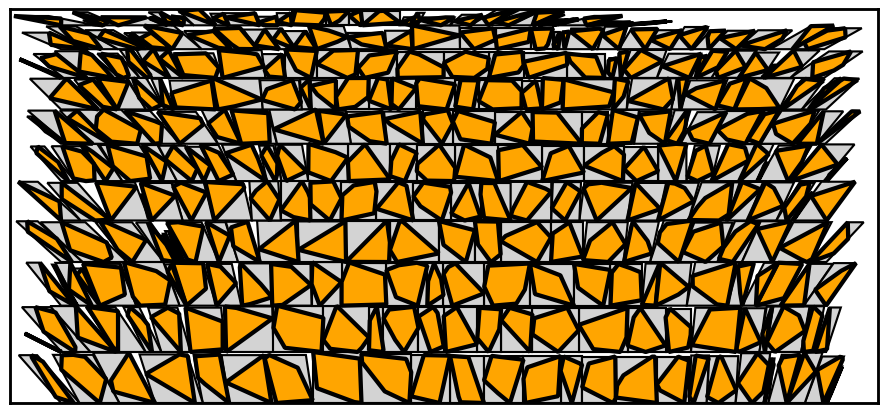

In [6]:
# The function 'visualize_polygons' can now be called to plot the packing. One may choose to leave away the parameter 'bounding_parallelograms' if the bounding-parallelograms should not be plotted.
visualize_polygons(packed_polygons, bounding_parallelograms = bounding_parallelograms, binsize = (width,height), file_name = 'demo_packing', normalize = 1.5)
